# Temperature Forecast

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
df.head(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9


#### Problem statement 1

#### a) Design a predictive model with the use of machine learning algorithms to forecast Temperature Min and Max for Next Day.

In [4]:
# Checking the shape of the dataset
df.shape

(7752, 25)

In [5]:
# Checking column names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
# Checking for the data types
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
# Checking for the nulll values if any
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
# Checking for the unique values
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

### Feature engineering

In [9]:
df['year']=df['Date'].str.split('-').str[0]

In [10]:
df['year']

0        30
1        30
2        30
3        30
4        30
       ... 
7747     30
7748     30
7749     30
7750    NaN
7751    NaN
Name: year, Length: 7752, dtype: object

In [11]:
df['month']=df['Date'].str.split('-').str[1]

In [12]:
df['month']

0        06
1        06
2        06
3        06
4        06
       ... 
7747     08
7748     08
7749     08
7750    NaN
7751    NaN
Name: month, Length: 7752, dtype: object

In [13]:
df['day']=df['Date'].str.split('-').str[2]

In [14]:
df['day']

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
7747    2017
7748    2017
7749    2017
7750     NaN
7751     NaN
Name: day, Length: 7752, dtype: object

In [15]:
#We can drop date column now
df.drop(columns='Date',inplace =True)

In [16]:
df.head(2)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013


## EDA

In [17]:
# Checking the data distribution

In [19]:
# Separating the numerical values
df_numerical=df[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','lat','lon','DEM','Slope','Solar radiation']]
    

In [20]:
df_numerical

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,37.6046,126.991,212.3350,2.785000,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,37.6046,127.032,44.7624,0.514100,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,37.5776,127.058,33.3068,0.266100,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,37.6450,127.022,45.7160,2.534800,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,37.5507,127.135,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,37.5372,126.891,15.5876,0.155400,4443.313965
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,37.5237,126.909,17.2956,0.222300,4438.373535
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,37.5237,126.970,19.5844,0.271300,4451.345215
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508


In [21]:
df_numerical.shape

(7752, 14)

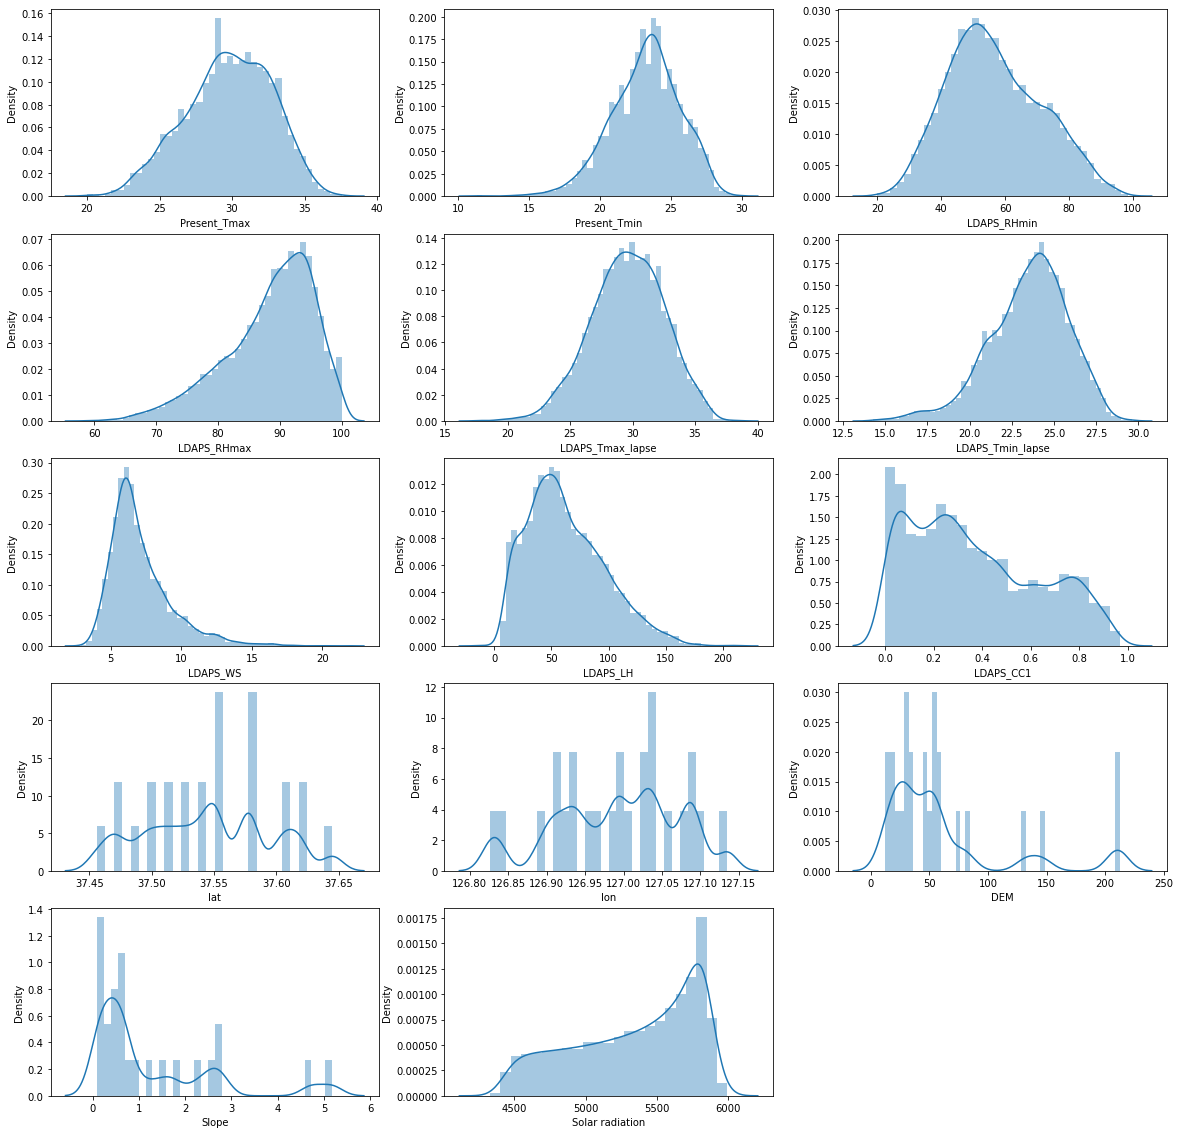

In [22]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df_numerical:
    if plotnumber <=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [23]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
year                 object
month                object
day                  object
dtype: object

In [24]:
#Checking statistics 
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [28]:
df['station'].value_counts()

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

<AxesSubplot:xlabel='count', ylabel='station'>

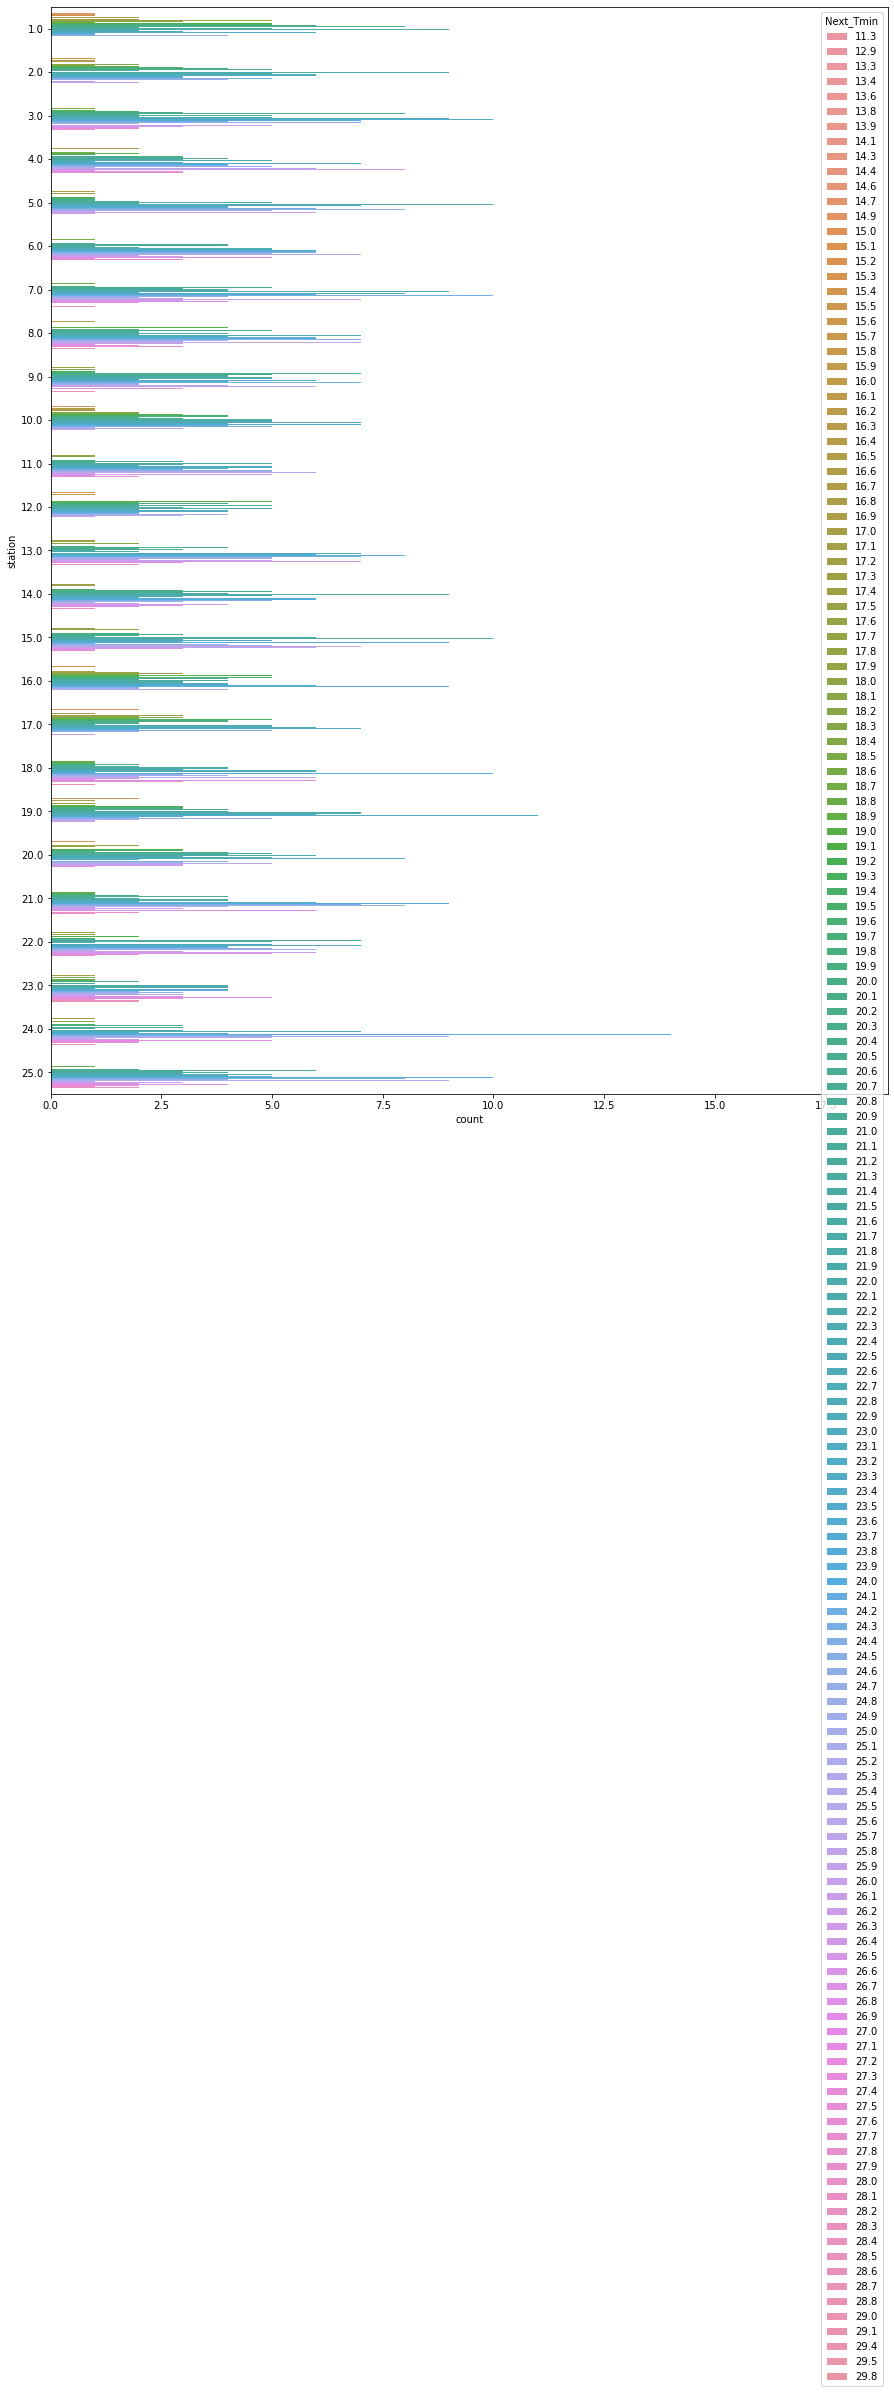

In [39]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['station'],hue=df['Next_Tmin'])

<AxesSubplot:xlabel='count', ylabel='station'>

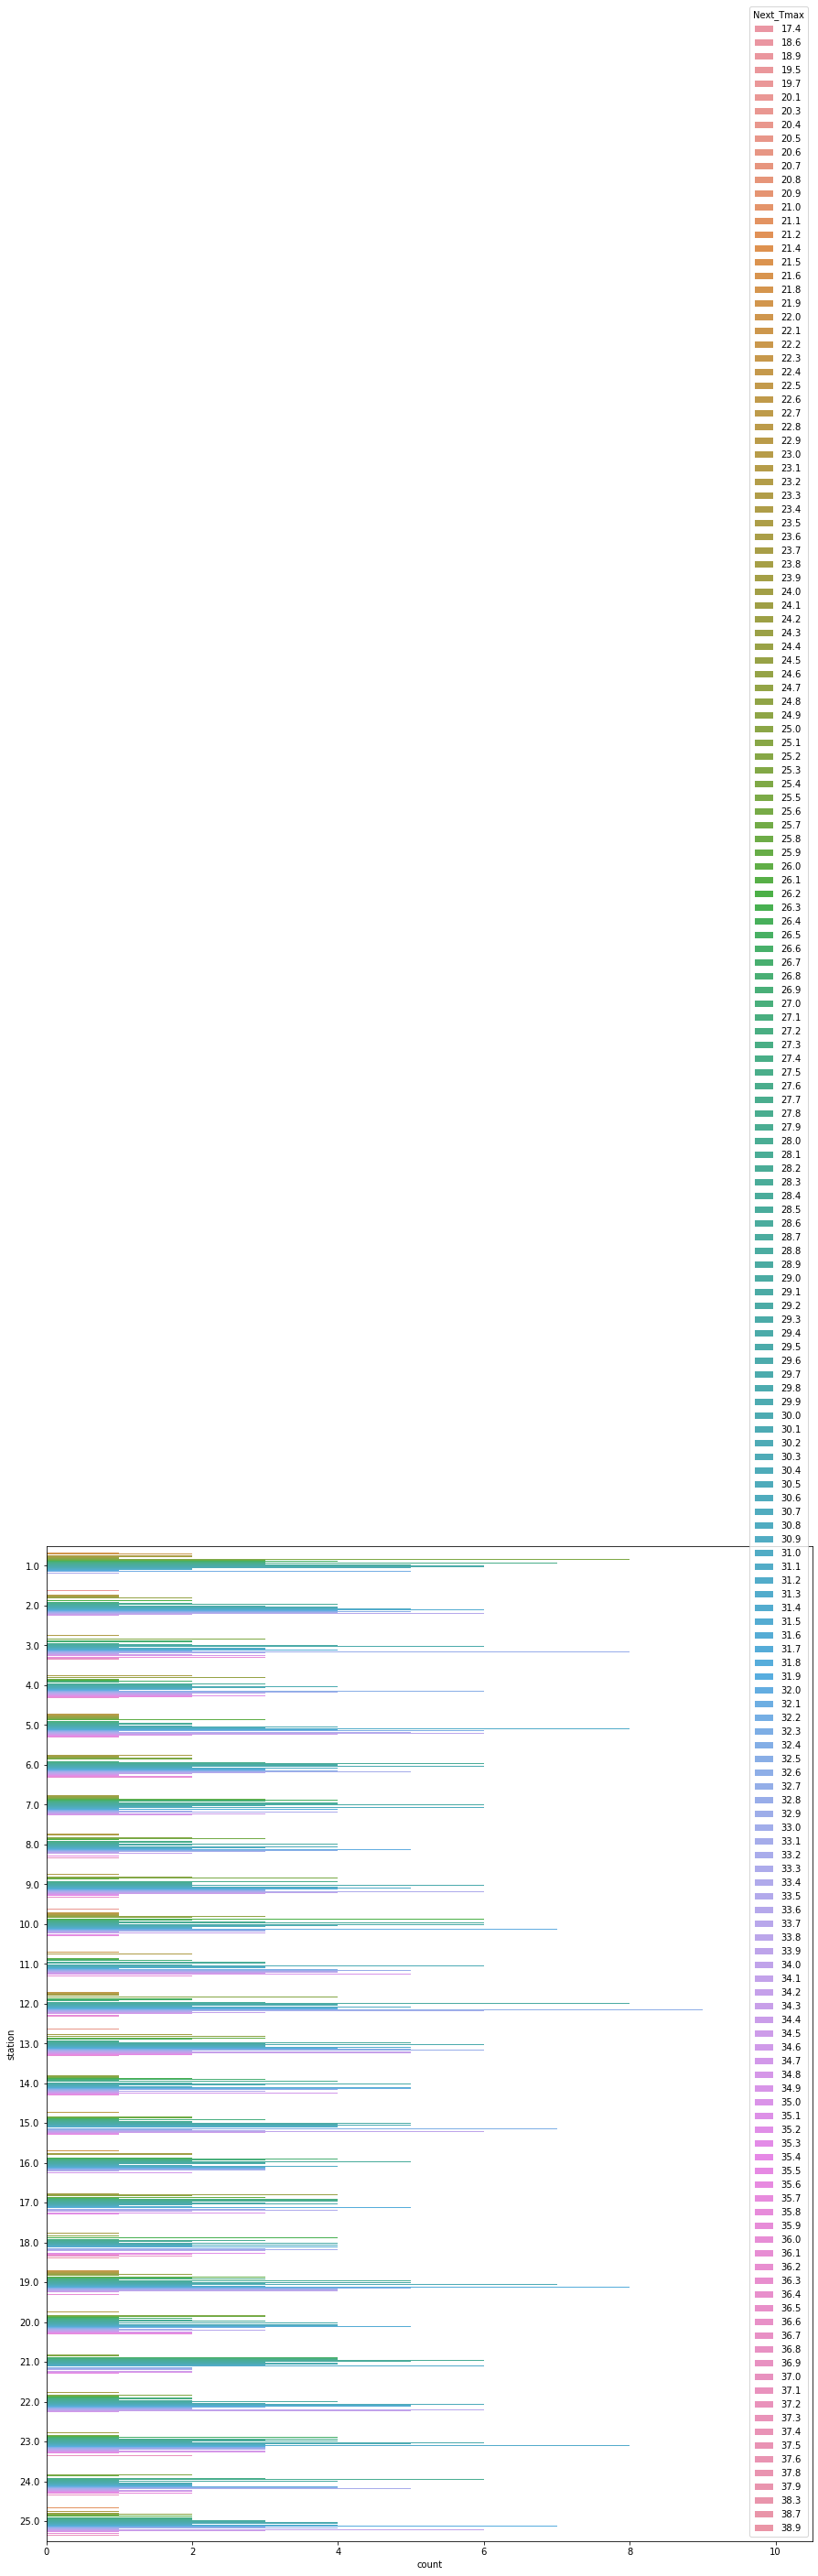

In [40]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['station'],hue=df['Next_Tmax'])

The temerpaure is not evenly distributed across the station. 

In [41]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year', 'month', 'day'],
      dtype='object')

#### Handling null values

In [43]:
#Using mean method where the data is normally distributed
#Present_Tmax 
df['Present_Tmax'] = df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
#Present_Tmin
df['Present_Tmin'] = df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
#LDAPS_RHmin
df['LDAPS_RHmin'] = df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mode()[0])
#LDAPS_RHmax
df['LDAPS_RHmax'] = df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
#LDAPS_Tmax_lapse
df['LDAPS_Tmax_lapse'] = df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
#LDAPS_Tmin_lapse
df['LDAPS_Tmin_lapse'] = df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mode()[0])
#LDAPS_WS
df['LDAPS_WS'] = df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
#LDAPS_LH
df['LDAPS_LH'] = df['LDAPS_LH'].fillna(df['LDAPS_LH'].mode()[0])
#LDAPS_CC1
df['LDAPS_CC1'] = df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mode()[0])
#LDAPS_CC2
df['LDAPS_CC2'] = df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mode()[0])
#LDAPS_CC3
df['LDAPS_CC3'] = df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mode()[0])
#LDAPS_CC4
df['LDAPS_CC4'] = df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mode()[0])
#LDAPS_PPT1
df['LDAPS_PPT1'] = df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mode()[0])
#LDAPS_PPT2
df['LDAPS_PPT2'] = df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mode()[0])
#LDAPS_PPT3
df['LDAPS_PPT3'] = df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mode()[0])
#LDAPS_PPT4
df['LDAPS_PPT4'] = df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mode()[0])
#lat
df['lat'] = df['lat'].fillna(df['lat'].mean()) 
#lon
df['lon'] = df['lon'].fillna(df['lon'].mean()) 
#DEM
df['DEM'] = df['DEM'].fillna(df['DEM'].mean())     
#Slope
df['Slope'] = df['Slope'].fillna(df['Slope'].mean())  
#Solar radiation
df['Solar radiation'] = df['Solar radiation'].fillna(df['Solar radiation'].mean())  
#Next_Tmax
df['Next_Tmax'] = df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
#Next_Tmin
df['Next_Tmin'] = df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [44]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.401741,88.374804,29.613447,23.423193,7.097875,61.768678,0.365206,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.956557,2.403036,15.038788,7.157124,2.932898,2.503109,2.173245,34.383864,0.263668,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.735368,84.316923,27.693091,22.032374,5.686487,36.776474,0.141643,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,54.828714,89.699505,29.662273,23.735942,6.563068,56.487289,0.312156,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [45]:
df.isnull().sum()

station             2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                2
month               2
day                 2
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


### Data Visualization

#### Univariate analysis

<AxesSubplot:xlabel='Next_Tmax', ylabel='count'>

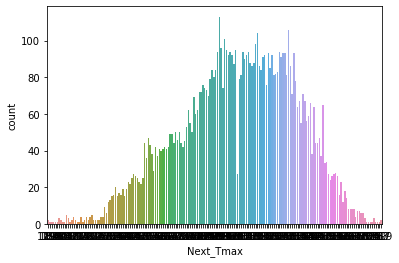

In [47]:
sns.countplot(x=df['Next_Tmax'])

<AxesSubplot:xlabel='Next_Tmin', ylabel='count'>

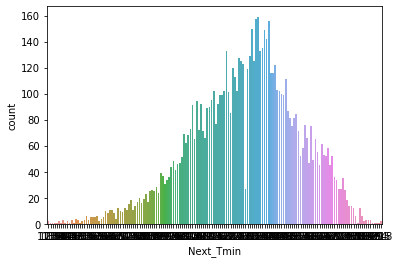

In [48]:
sns.countplot(x=df['Next_Tmin'])

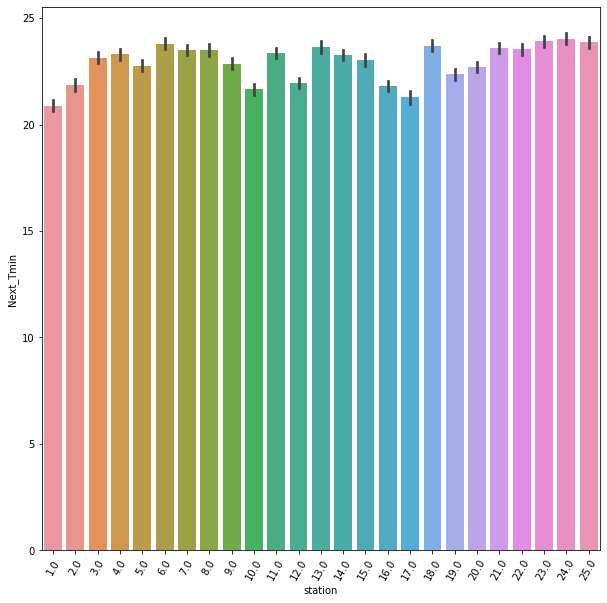

In [51]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['station'],y=df['Next_Tmin'])
plt.xticks(rotation=60)
plt.show()

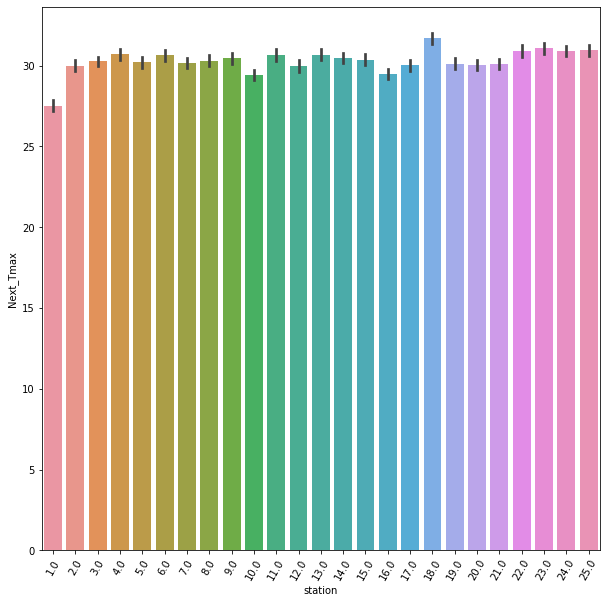

In [52]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['station'],y=df['Next_Tmax'])
plt.xticks(rotation=60)
plt.show()

#### Bivariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

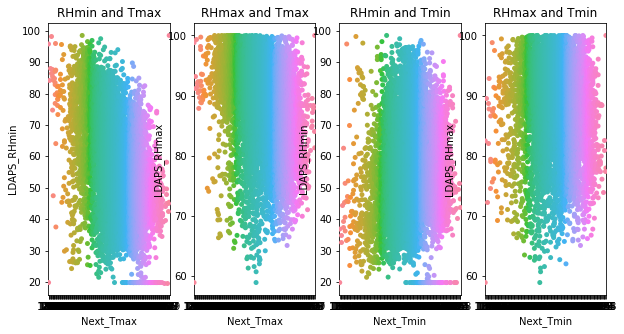

In [64]:
#checking the relation between LDAPS_RHmin & LDAPS_RHmax vs Next_Tmax and Next_Tmin
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
sns.stripplot(y='LDAPS_RHmin',x='Next_Tmax',data=df)
plt.title('RHmin and Tmax')
plt.subplot(1,4,2)
sns.stripplot(y='LDAPS_RHmax',x='Next_Tmax',data=df)
plt.title('RHmax and Tmax')
plt.subplot(1,4,3)
sns.stripplot(y='LDAPS_RHmin',x='Next_Tmin',data=df)
plt.title('RHmin and Tmin')
plt.subplot(1,4,4)
sns.stripplot(y='LDAPS_RHmax',x='Next_Tmin',data=df)
plt.title('RHmax and Tmin')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

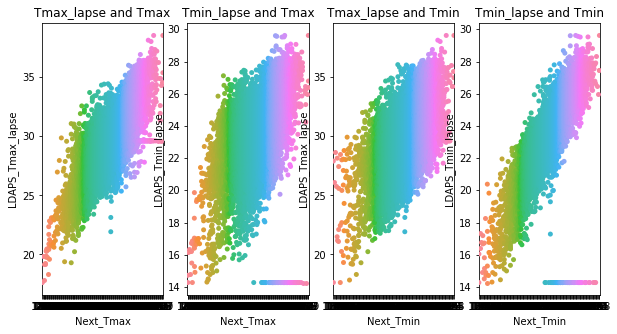

In [66]:
#checking the relation between LDAPS_Tmax_lapse & LDAPS_Tmin_lapse vs Next_Tmax and Next_Tmin
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
sns.stripplot(y='LDAPS_Tmax_lapse',x='Next_Tmax',data=df)
plt.title('Tmax_lapse and Tmax')
plt.subplot(1,4,2)
sns.stripplot(y='LDAPS_Tmin_lapse',x='Next_Tmax',data=df)
plt.title('Tmin_lapse and Tmax')
plt.subplot(1,4,3)
sns.stripplot(y='LDAPS_Tmax_lapse',x='Next_Tmin',data=df)
plt.title('Tmax_lapse and Tmin')
plt.subplot(1,4,4)
sns.stripplot(y='LDAPS_Tmin_lapse',x='Next_Tmin',data=df)
plt.title('Tmin_lapse and Tmin')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

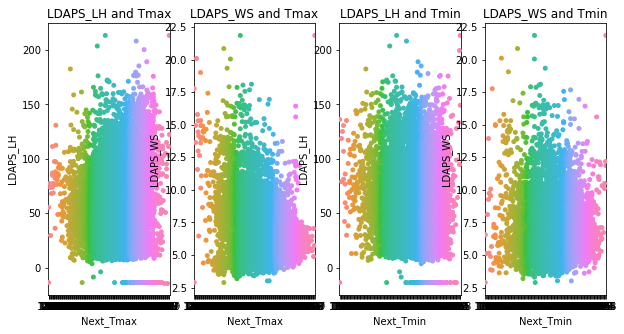

In [67]:
#checking the relation between LDAPS_WS & LDAPS_LH vs Next_Tmax and Next_Tmin
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
sns.stripplot(y='LDAPS_LH',x='Next_Tmax',data=df)
plt.title('LDAPS_LH and Tmax')
plt.subplot(1,4,2)
sns.stripplot(y='LDAPS_WS',x='Next_Tmax',data=df)
plt.title('LDAPS_WS and Tmax')
plt.subplot(1,4,3)
sns.stripplot(y='LDAPS_LH',x='Next_Tmin',data=df)
plt.title('LDAPS_LH and Tmin')
plt.subplot(1,4,4)
sns.stripplot(y='LDAPS_WS',x='Next_Tmin',data=df)
plt.title('LDAPS_WS and Tmin')
plt.show

#### As seen from the series of analysis with different graphs there is no linear relationship

In [68]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year', 'month', 'day'],
      dtype='object')

### Correlation

In [69]:
corr=df.corr()

In [70]:
corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112786,0.131922,-0.064830,-0.167196,0.069223,0.097803,0.005294,-0.130393,0.006857,...,-0.008325,-0.012606,-0.010526,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108155,0.128539
Present_Tmax,0.112786,1.000000,0.618760,-0.216032,-0.301787,0.570129,0.555128,-0.121820,0.116512,-0.318810,...,-0.101377,-0.122044,-0.101178,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.131922,0.618760,1.000000,0.089975,-0.015140,0.464151,0.667059,-0.034675,-0.035648,0.066838,...,0.064829,-0.049005,-0.065647,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.064830,-0.216032,0.089975,1.000000,0.562127,-0.547994,0.167924,0.285713,-0.015007,0.623117,...,0.385851,0.239174,0.168888,0.084541,-0.073998,0.099121,0.120115,0.248989,-0.454107,0.070674
LDAPS_RHmax,-0.167196,-0.301787,-0.015140,0.562127,1.000000,-0.373404,-0.106430,0.135333,0.232911,0.432540,...,0.228966,0.134570,0.117824,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069223,0.570129,0.464151,-0.547994,-0.373404,1.000000,0.609828,-0.311996,0.046870,-0.434310,...,-0.242033,-0.188063,-0.160235,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.097803,0.555128,0.667059,0.167924,-0.106430,0.609828,1.000000,-0.121248,-0.044372,0.059542,...,0.010587,-0.074058,-0.080301,-0.089752,-0.024898,-0.182240,-0.173282,0.167306,0.503657,0.788333
LDAPS_WS,0.005294,-0.121820,-0.034675,0.285713,0.135333,-0.311996,-0.121248,1.000000,0.006551,0.286719,...,0.191816,0.161639,0.144050,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.130393,0.116512,-0.035648,-0.015007,0.232911,0.046870,-0.044372,0.006551,1.000000,-0.112777,...,-0.069813,0.020818,0.024259,0.130056,0.025208,0.053829,0.084725,-0.035381,0.127689,-0.073533
LDAPS_CC1,0.006857,-0.318810,0.066838,0.623117,0.432540,-0.434310,0.059542,0.286719,-0.112777,1.000000,...,0.389348,0.170330,0.093844,-0.008054,-0.006779,-0.013954,-0.020553,0.223127,-0.464824,-0.023189


<AxesSubplot:>

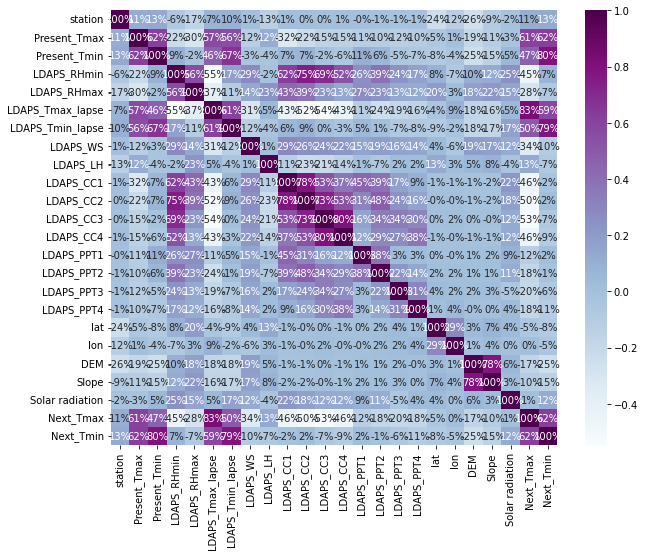

In [71]:
# Vizualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".0%",cmap="BuPu")

## Outlier detection using boxplot

In [72]:
df_numerical =df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']]
    

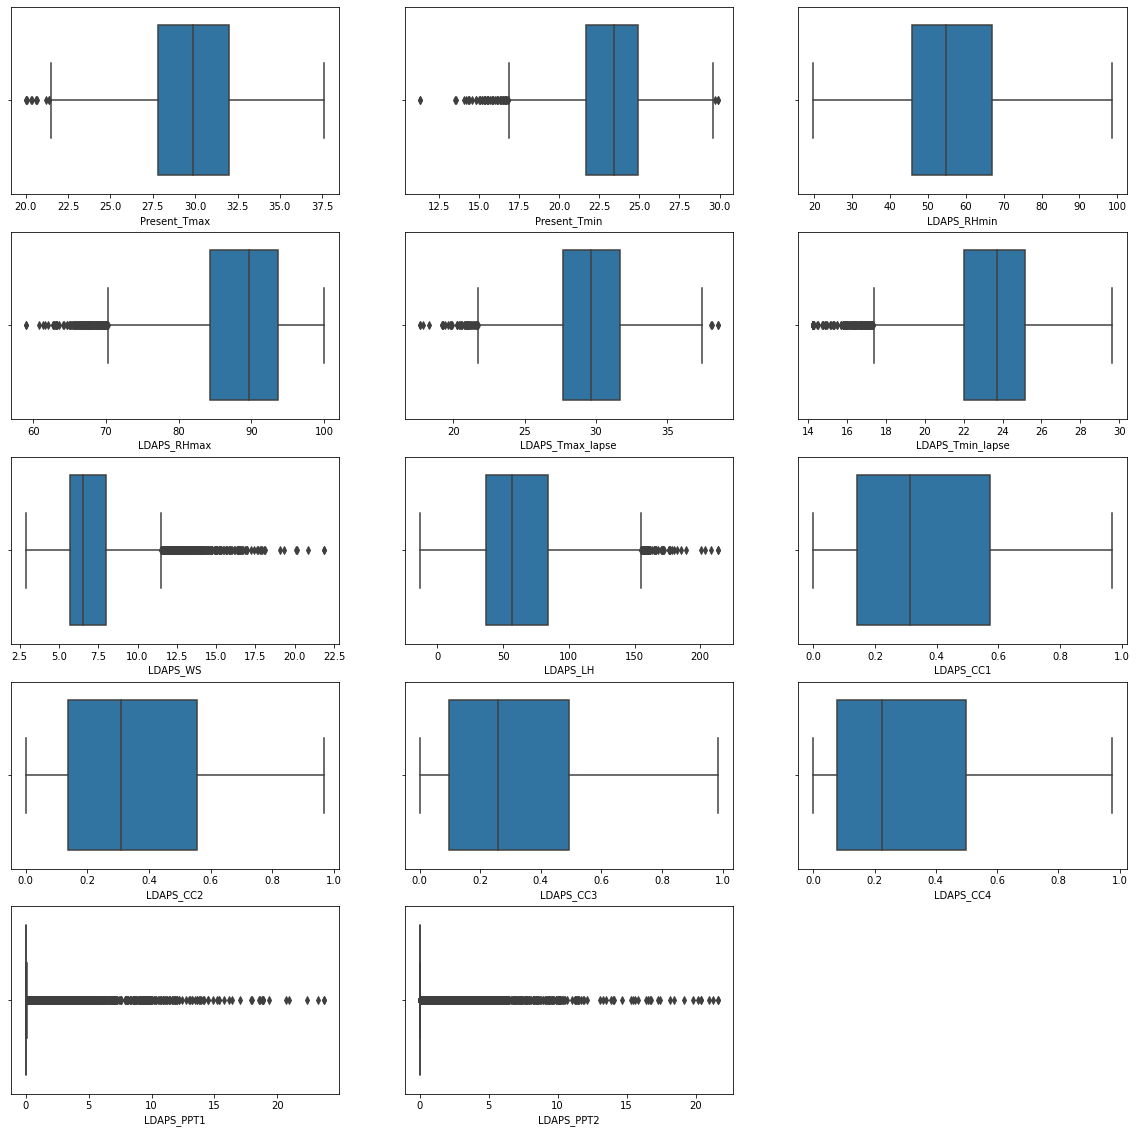

In [73]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df_numerical:
    if plotnumber <=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

# Removing outliers using z score method

In [74]:
# Dealing with outliers
from scipy.stats import zscore
z=np.abs(zscore(df_numerical))
z

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0.361326,0.759529,0.123286,0.383078,0.524889,0.166307,0.128382,0.223466,0.497849,0.573957,...,0.273714,0.238242,0.222227,1.189286,0.005000,2.772243,1.115004,1.517935,0.376282,0.697599
1,0.721084,0.676296,0.275196,0.311586,0.080895,0.244438,0.646994,0.285944,0.529859,0.389214,...,0.273714,0.238242,0.222227,1.189286,0.511177,0.315157,0.542158,1.229950,0.072097,0.174064
2,0.619608,0.031188,0.512791,0.614982,0.162936,0.456438,0.441604,1.198187,0.591169,0.367227,...,0.273714,0.238242,0.222227,0.653021,0.838510,0.526218,0.723133,1.216534,0.264260,0.389744
3,0.754909,0.072805,0.122228,1.133054,0.031092,0.038761,0.666247,0.115133,0.564511,0.488652,...,0.273714,0.238242,0.222227,1.991696,0.385280,0.297588,0.932424,1.201176,0.456422,0.550832
4,0.551957,0.551446,0.015138,0.248765,0.170325,0.025285,0.627154,1.343649,0.810917,0.396068,...,0.273714,0.238242,0.222227,0.118743,1.807917,0.494322,0.548433,1.207205,0.296287,0.174064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,2.187892,2.549048,1.972389,1.328126,1.112066,1.856817,0.436683,0.299276,1.271272,1.048052,...,0.273714,0.238242,0.222227,0.149390,1.263971,0.852681,0.803915,2.093040,0.632499,1.946031
7748,2.187892,2.299348,2.151982,1.548184,0.887662,1.873661,0.255421,0.422528,1.249123,1.071485,...,0.273714,0.238242,0.222227,0.417522,1.037356,0.821213,0.755095,2.104553,0.536418,1.664127
7749,2.221718,2.424198,2.225637,1.555342,0.570780,1.957783,0.088072,1.532173,1.199513,1.129729,...,0.273714,0.238242,0.222227,0.417522,0.269384,0.779043,0.719338,2.074325,0.792634,2.227935
7750,3.304127,4.962817,2.434334,4.113443,4.087857,3.655908,1.939757,2.192213,1.385188,1.360750,...,0.273714,0.238242,0.222227,1.758184,2.082302,0.911963,0.845455,2.358212,4.123453,4.684525


In [75]:
df_z=df[(z<3).all(axis=1)] # removing outliers for z score value of more than 3 

In [76]:
df.shape

(7752, 27)

In [77]:
df_z.shape

(6835, 27)

In [79]:
#percentage loss
p_loss = (7752-6835)/7752*100

In [80]:
p_loss

11.829205366357069

In [81]:
#Checking for the skewness in the dataset
df_z.skew()

station             0.003216
Present_Tmax       -0.271502
Present_Tmin       -0.229115
LDAPS_RHmin         0.308191
LDAPS_RHmax        -0.682775
LDAPS_Tmax_lapse   -0.125621
LDAPS_Tmin_lapse   -0.422365
LDAPS_WS            1.085929
LDAPS_LH            0.572027
LDAPS_CC1           0.592309
LDAPS_CC2           0.500193
LDAPS_CC3           0.698820
LDAPS_CC4           0.713577
LDAPS_PPT1          3.731054
LDAPS_PPT2          4.846054
LDAPS_PPT3          5.489992
LDAPS_PPT4          5.942252
lat                 0.108498
lon                -0.275425
DEM                 1.763938
Slope               1.593380
Solar radiation    -0.515831
Next_Tmax          -0.275609
Next_Tmin          -0.249704
year               -0.002213
month              -0.189907
day                 0.015885
dtype: float64

In [82]:
# Converting categorical objectives into numerical type
#Importing Label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [84]:
df_categorical=df[['station', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'Next_Tmax', 'Next_Tmin']]

In [85]:
le=LabelEncoder()
df_z["station"]=le.fit_transform(df_z["station"])
df_z["LDAPS_CC1"]=le.fit_transform(df_z["LDAPS_CC1"])
df_z["LDAPS_CC2"]=le.fit_transform(df_z["LDAPS_CC2"])
df_z["LDAPS_CC13"]=le.fit_transform(df_z["LDAPS_CC3"])
df_z["Next_Tmax"]=le.fit_transform(df_z["Next_Tmax"])
df_z["Next_Tmin"]=le.fit_transform(df_z["Next_Tmin"])

In [86]:
df.head(2)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013


In [87]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6835 entries, 0 to 7749
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           6835 non-null   int64  
 1   Present_Tmax      6835 non-null   float64
 2   Present_Tmin      6835 non-null   float64
 3   LDAPS_RHmin       6835 non-null   float64
 4   LDAPS_RHmax       6835 non-null   float64
 5   LDAPS_Tmax_lapse  6835 non-null   float64
 6   LDAPS_Tmin_lapse  6835 non-null   float64
 7   LDAPS_WS          6835 non-null   float64
 8   LDAPS_LH          6835 non-null   float64
 9   LDAPS_CC1         6835 non-null   int64  
 10  LDAPS_CC2         6835 non-null   int64  
 11  LDAPS_CC3         6835 non-null   float64
 12  LDAPS_CC4         6835 non-null   float64
 13  LDAPS_PPT1        6835 non-null   float64
 14  LDAPS_PPT2        6835 non-null   float64
 15  LDAPS_PPT3        6835 non-null   float64
 16  LDAPS_PPT4        6835 non-null   float64


In [88]:
df_z['year']=df_z['year'].astype(int)
df_z['month']=df_z['month'].astype(int)
df_z['day']=df_z['day'].astype(int)

Thus we have converted all the categorical data into numerical type

# Feature selection

In [89]:
x = df_z.drop("Next_Tmax", axis=1)
y =df_z["Next_Tmin"]

In [90]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,year,month,day,LDAPS_CC13
0,0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,2625,...,37.6046,126.991,212.3350,2.7850,5992.895996,56,30,6,2013,2397
1,1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,2525,...,37.6046,127.032,44.7624,0.5141,5869.312500,69,30,6,2013,2366
2,2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,2322,...,37.5776,127.058,33.3068,0.2661,5863.555664,84,30,6,2013,2928
3,3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,2420,...,37.6450,127.022,45.7160,2.5348,5856.964844,88,30,6,2013,2391
4,4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,1772,...,37.5507,127.135,35.0380,0.5055,5859.552246,69,30,6,2013,2623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,20,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,691,...,37.5507,127.040,26.2980,0.5721,4456.024414,21,30,8,2017,0
7746,21,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,857,...,37.5102,127.086,21.9668,0.1332,4441.803711,15,30,8,2017,2
7747,22,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,359,...,37.5372,126.891,15.5876,0.1554,4443.313965,25,30,8,2017,0
7748,23,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,438,...,37.5237,126.909,17.2956,0.2223,4438.373535,32,30,8,2017,0


In [91]:
#Removing skewness in the dataset using power transform method
#importing power transform from library
from sklearn.preprocessing import power_transform

In [92]:
x=power_transform(x,method="yeo-johnson")
x

array([[-1.92107171, -0.46829645, -0.83252031, ..., -2.43806738,
        -1.0648137 , -0.35320685],
       [-1.67978927,  0.67829238, -0.75043688, ..., -2.43806738,
        -1.0648137 , -0.36940665],
       [-1.47102382,  0.56536448, -0.02772786, ..., -2.43806738,
        -1.0648137 , -0.08552734],
       ...,
       [ 1.2991468 , -2.11545405, -2.44542587, ...,  1.0069379 ,
         1.59722056, -2.20737654],
       [ 1.41166587, -2.11545405, -2.23796029, ...,  1.0069379 ,
         1.59722056, -2.20737654],
       [ 1.52290354, -2.14258161, -2.34241352, ...,  1.0069379 ,
         1.59722056, -2.20737654]])

In [93]:
# Scaling the data using standard scaler
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [94]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-1.92107171, -0.46829645, -0.83252031, ..., -2.43806738,
        -1.2983014 , -0.35320685],
       [-1.67978927,  0.67829238, -0.75043688, ..., -2.43806738,
        -1.2983014 , -0.36940665],
       [-1.47102382,  0.56536448, -0.02772786, ..., -2.43806738,
        -1.2983014 , -0.08552734],
       ...,
       [ 1.2991468 , -2.11545405, -2.44542587, ...,  1.0069379 ,
         1.42191504, -2.20737654],
       [ 1.41166587, -2.11545405, -2.23796029, ...,  1.0069379 ,
         1.42191504, -2.20737654],
       [ 1.52290354, -2.14258161, -2.34241352, ...,  1.0069379 ,
         1.42191504, -2.20737654]])

# Model Building

In [95]:
#importing ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [96]:
#Training the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=56)

In [97]:
# finding the best model
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc=dtc.predict(x_test)
cvscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5).mean()
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))
print("cross val score=",(cvscore*100))

0.9894675248683441
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.50      0.25      0.33         4
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00       

In [98]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
cvscore=cross_val_score(SVC(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predsvc))
print("confusion matrix=",confusion_matrix(y_test,predsvc))
print("classification report=",classification_report(y_test,predsvc))
print("cross val score=",(cvscore*100))

accuracy score= 0.04564072557050907
confusion matrix= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
classification report=               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00   

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
cvscore=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predrfc))
print("confusion matrix=",confusion_matrix(y_test,predrfc))
print("classification report=",classification_report(y_test,predrfc))
print("cross val score=",(cvscore*100))

accuracy score= 0.502633118782914
confusion matrix= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
classification report=               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00     

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
cvscore=cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predgbc))
print("confusion matrix=",confusion_matrix(y_test,predgbc))
print("classification report=",classification_report(y_test,predgbc))
print("cross val score=",(cvscore*100))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
cvscore=cross_val_score(ExtraTreesClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predetc))
print("confusion matrix=",confusion_matrix(y_test,predetc))
print("classification report=",classification_report(y_test,predetc))
print("cross val score=",(cvscore*100))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predlr))
print("confusion matrix=",confusion_matrix(y_test,predlr))
print("classification report=",classification_report(y_test,predlr))
print("cross val score=",(cvscore*100))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predknc))
print("confusion matrix=",confusion_matrix(y_test,predknc))
print("classification report=",classification_report(y_test,predknc))
print("cross val score=",(cvscore*100))

# The accuracy score is 51 %

In [189]:
# Saving the model

#saving the file
import pickle
filename="Temerature forecast.pkl"
pickle.dump(rfc,open(filename,"wb"))